# 04 — Results

**Goal:** Aggregate results, pick a winner, and fine-tune best model

**Checklist**
- Load cross-val results from previous notebook.
- Pick best model by average rankings on the tree metrics (e.g., RMSE).
- Fine-tune the best model for maximum accuracy

# I. Comparison & Report

In [69]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [70]:
# Set the style
sns.set(style='whitegrid', font_scale=1.1)

## Load results for comparison

We will start by loading the `model_comparison.csv` file we have saved from the previous notebook, where we have stored all the results and metrics of the nine different types of models we have trained on our bodyfat dataset.

In case of future needs, we will create another two dataframes derived from it:
- `s_results` - contains all the results of the models that were trained on the 'scaled-only' data.
- `fs_results` - contains all the results of the models that were trained on the 'scaled-only' data.

In [71]:
results = pd.read_csv('/kaggle/input/bf-model-comparison/model_comparison.csv')
results

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
0,Scaled-only,DecisionTree,0.425027,0.109527,4.270588,5.545463,0.338920
1,Feature-Selected,DecisionTree,0.297680,0.115825,4.360784,5.549810,0.337883
2,Scaled-only,LinearRegression,0.686319,0.031946,3.329254,4.240279,0.613484
3,Feature-Selected,LinearRegression,0.695245,0.035255,3.248772,4.029500,0.650956
4,Scaled-only,RandomForest,0.666268,0.054562,3.401824,4.097010,0.639162
5,Feature-Selected,RandomForest,0.655445,0.047001,3.328765,3.984024,0.658790
6,Scaled-only,GradientBoosting,0.625801,0.083593,3.308267,4.061587,0.645375
7,Feature-Selected,GradientBoosting,0.600088,0.077933,3.501641,4.396792,0.584424
8,Scaled-only,XGBoost,0.630576,0.074766,3.329362,4.112081,0.636502
9,Feature-Selected,XGBoost,0.587623,0.085667,3.304916,4.203455,0.620168


In [72]:
s_results = results[results['Dataset'] == 'Scaled-only']
s_results

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
0,Scaled-only,DecisionTree,0.425027,0.109527,4.270588,5.545463,0.338920
2,Scaled-only,LinearRegression,0.686319,0.031946,3.329254,4.240279,0.613484
4,Scaled-only,RandomForest,0.666268,0.054562,3.401824,4.097010,0.639162
6,Scaled-only,GradientBoosting,0.625801,0.083593,3.308267,4.061587,0.645375
8,Scaled-only,XGBoost,0.630576,0.074766,3.329362,4.112081,0.636502
10,Scaled-only,Ridge,0.689364,0.031347,3.329175,4.261240,0.609653
12,Scaled-only,ElasticNet,0.605416,0.057165,4.075815,4.845861,0.495199
14,Scaled-only,SVR,0.508879,0.053317,4.199976,5.130864,0.434074
16,Scaled-only,KNRegressor,0.564583,0.073110,4.030980,4.807285,0.503204


In [73]:
fs_results = results[results['Dataset'] == 'Feature-Selected']
fs_results

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
1,Feature-Selected,DecisionTree,0.297680,0.115825,4.360784,5.549810,0.337883
3,Feature-Selected,LinearRegression,0.695245,0.035255,3.248772,4.029500,0.650956
5,Feature-Selected,RandomForest,0.655445,0.047001,3.328765,3.984024,0.658790
7,Feature-Selected,GradientBoosting,0.600088,0.077933,3.501641,4.396792,0.584424
9,Feature-Selected,XGBoost,0.587623,0.085667,3.304916,4.203455,0.620168
11,Feature-Selected,Ridge,0.698422,0.029387,3.259923,4.043927,0.648452
13,Feature-Selected,ElasticNet,0.570783,0.053047,4.120743,4.975756,0.467774
15,Feature-Selected,SVR,0.463301,0.067848,3.907628,4.886839,0.486625
17,Feature-Selected,KNRegressor,0.536755,0.079227,3.880000,4.688168,0.527519


## 1. Comparing cross-validation results



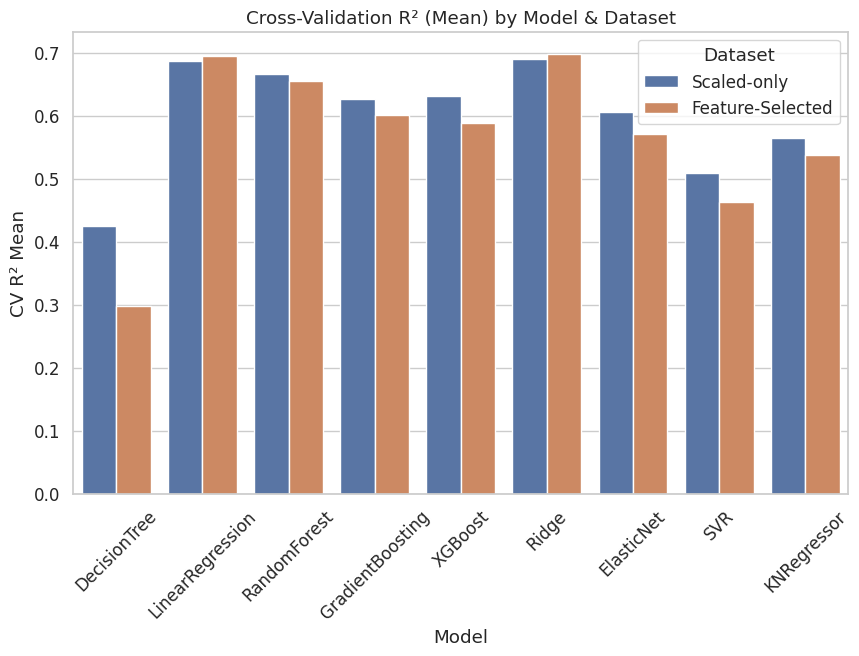

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(data=results, x='Model', y='CV_R2_Mean', hue='Dataset')
plt.title('Cross-Validation R² (Mean) by Model & Dataset')
plt.ylabel('CV R² Mean')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

## 2. Compare test results based on R² score

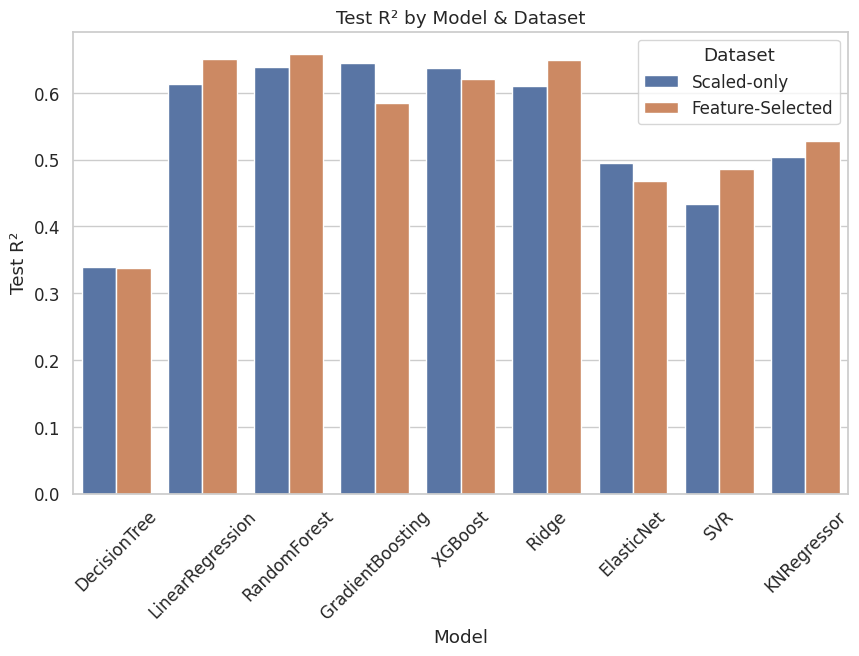

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='Test_R2', hue='Dataset')
plt.title('Test R² by Model & Dataset')
plt.ylabel('Test R²')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

## 3. Compare test results based on MAE score

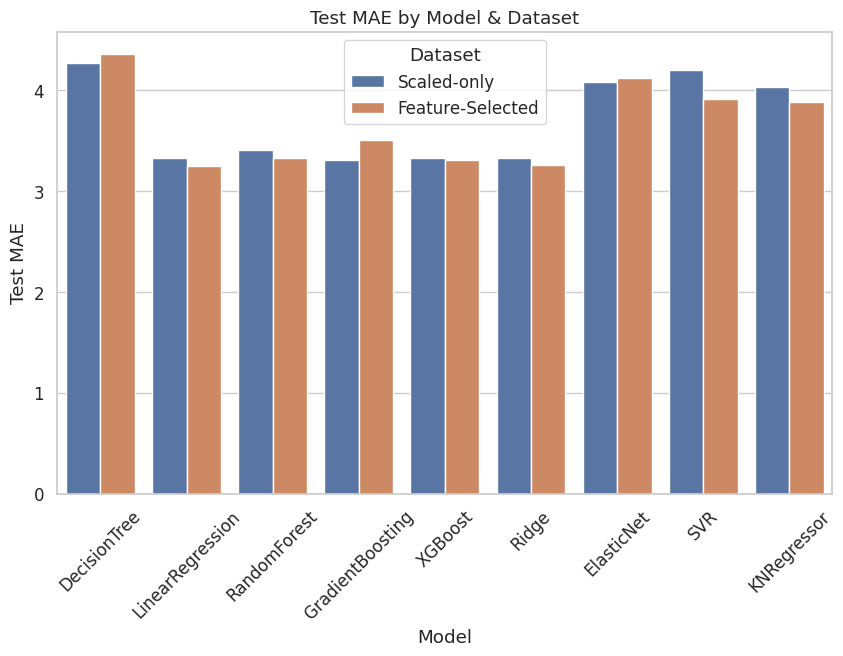

In [76]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='Test_MAE', hue='Dataset')
plt.title('Test MAE by Model & Dataset')
plt.ylabel('Test MAE')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

## 4. Compare test results based on RMSE score

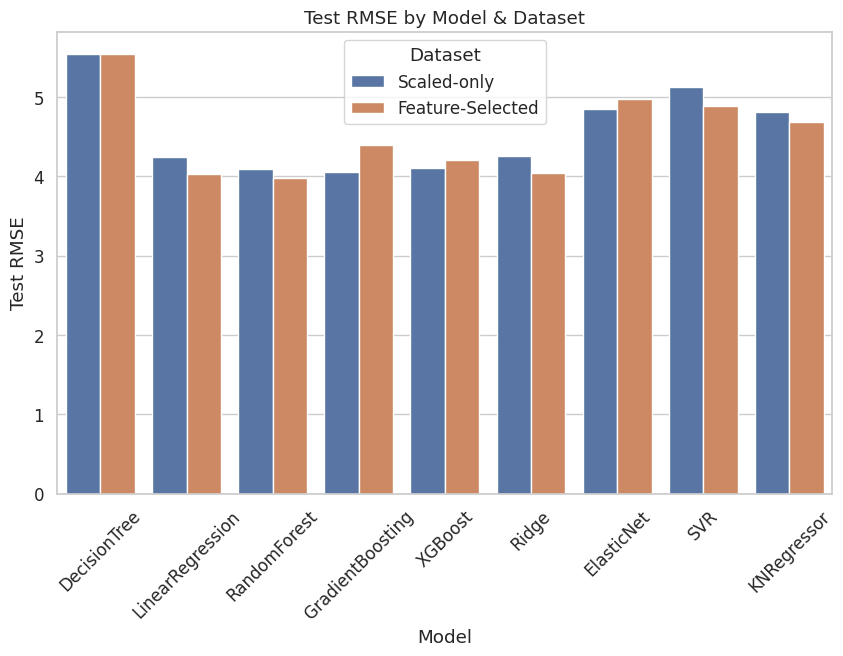

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='Test_RMSE', hue='Dataset')
plt.title('Test RMSE by Model & Dataset')
plt.ylabel('Test RMSE')
plt.xticks(rotation=45)
plt.legend(title='Dataset')
plt.show()

## Highlighting the best models based on test results

In [78]:
# Top 2 models with the best R² scores
best_r2 = results.sort_values(by='Test_R2', ascending=False)
best_r2.head(3)

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
5,Feature-Selected,RandomForest,0.655445,0.047001,3.328765,3.984024,0.658790
3,Feature-Selected,LinearRegression,0.695245,0.035255,3.248772,4.029500,0.650956
11,Feature-Selected,Ridge,0.698422,0.029387,3.259923,4.043927,0.648452


In [79]:
# Top 2 models with the best MAE scores
best_mae = results.sort_values(by='Test_MAE')
best_mae.head(3)

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
3,Feature-Selected,LinearRegression,0.695245,0.035255,3.248772,4.029500,0.650956
11,Feature-Selected,Ridge,0.698422,0.029387,3.259923,4.043927,0.648452
9,Feature-Selected,XGBoost,0.587623,0.085667,3.304916,4.203455,0.620168


In [80]:
# Top 2 models with the best RMSE scores
best_rmse = results.sort_values(by='Test_RMSE')
best_rmse.head(3)

,Dataset,Model,CV_R2_Mean,CV_R2_Std,Test_MAE,Test_RMSE,Test_R2
5,Feature-Selected,RandomForest,0.655445,0.047001,3.328765,3.984024,0.658790
3,Feature-Selected,LinearRegression,0.695245,0.035255,3.248772,4.029500,0.650956
11,Feature-Selected,Ridge,0.698422,0.029387,3.259923,4.043927,0.648452


Based on the evaluation we conducted, these are some of the major takeaways:
- Based on the three metrics we used to evaluate our models, all the models that made to the top spot were all trained on the 'feature-selected' dataset, which shows that on average, models performed the scaled AND feature-selected dataset performed far better and accurate than the models that were trained on the scaled-only dataset.
- Based on the three metrics, only two models were consistently in the top three ranks: **Linear Regression** and **Ridge** (Note: these models are also the top two models with the highest cross-validation scores)

Moving on to the next section, we will utilise these models and fine-tune their parameters to train the best model on our body fat dataset.

# II. Fine-Tune Best Model

We will start training the new model from scratch, which may be time-consuming on many occasions, but as the purpose of this project is to get the bearings around machine learning, reprtition and practice is more than welcome.

In [133]:
# Imports
import pandas as pd
from math import sqrt
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [82]:
# Load the dataset
arff_file = arff.loadarff('/kaggle/input/bodyfat/bodyfat.arff')
df = pd.DataFrame(arff_file[0])
df.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,class
0,1.0708,23.0,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
1,1.0853,22.0,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,1.0414,22.0,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
3,1.0751,26.0,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,10.4
4,1.0340,24.0,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,28.7


In [83]:
# Load objects
scaler = joblib.load('/kaggle/input/bf-objects/scaler.pkl')
selector = joblib.load('/kaggle/input/bf-objects/selector.pkl')

In [84]:
# Split X and y
y = df['class']
X = df.drop(['Density', 'class'], axis=1)

In [85]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
# Create a preprocessing pipeline
preprocess_pipeline = Pipeline([
    ('scaler', scaler),
    ('selector', selector)
])

In [87]:
X_train_preprocessed = preprocess_pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = preprocess_pipeline.transform(X_test)

In [136]:
# Train Linear Regression Model
model_1 = LinearRegression()
model_1.fit(X_train_preprocessed, y_train)

y_preds = model_1.predict(X_test_preprocessed)
mae_1 = mean_absolute_error(y_test, y_preds)
r2_1 = r2_score(y_test, y_preds)
rmse_1 = sqrt(mean_squared_error(y_test, y_preds))

print(f'On LinearRegression:- \n Mean Absolute Error: {round(mae_1, 3)} \n R² Score: {round(r2_1, 3)} \n Root Mean Squared Error: {round(rmse_1, 3)}')

On LinearRegression:- 
 Mean Absolute Error: 3.249 
 R² Score: 0.651 
 Root Mean Squared Error: 4.029


In [137]:
# Train Ridge Model
model_2 = Ridge(alpha=0.01, random_state=42)
model_2.fit(X_train_preprocessed, y_train)

y_preds_2 = model_2.predict(X_test_preprocessed)
mae_2 = mean_absolute_error(y_test, y_preds_2)
r2_2 = r2_score(y_test, y_preds_2)
rmse_2 = sqrt(mean_squared_error(y_test, y_preds_2))

print(f'On Ridge:- \n Mean Absolute Error: {round(mae_2, 3)} \n R² Score: {round(r2_2, 3)} \n Root Mean Squared Error: {round(rmse_2, 3)}')

On Ridge:- 
 Mean Absolute Error: 3.249 
 R² Score: 0.651 
 Root Mean Squared Error: 4.03


In [138]:
# Train Random Forest Model
model_3 = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=5,
    random_state=42
)

model_3.fit(X_train_preprocessed, y_train)

y_preds_3 = model_3.predict(X_test_preprocessed)
mae_3 = mean_absolute_error(y_test, y_preds_3)
r2_3 = r2_score(y_test, y_preds_3)
rmse_3 = sqrt(mean_squared_error(y_test, y_preds_3))

print(f'On RandomForest:- \n Mean Absolute Error: {round(mae_3, 3)} \n R² Score: {round(r2_3, 3)} \n Root Mean Squared Error: {round(rmse_3, 3)}')

On RandomForest:- 
 Mean Absolute Error: 3.184 
 R² Score: 0.675 
 Root Mean Squared Error: 3.889


`model_3` seems to be the best model so far, though double-checking the cross-validation score would be good practice to ensure that the scores weren't just due to luck on one split

In [114]:
# Cross-validation score for Ridge model
scores = -1 * cross_val_score(model_2, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("CV MAE score:\n", scores.mean())

RMSE score:
 3.702466592911533


In [115]:
# Cross-validation score for Random Forest model
scores = -1 * cross_val_score(model_3, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("CV MAE score:\n", scores.mean())

R² score:
 3.942157815425933


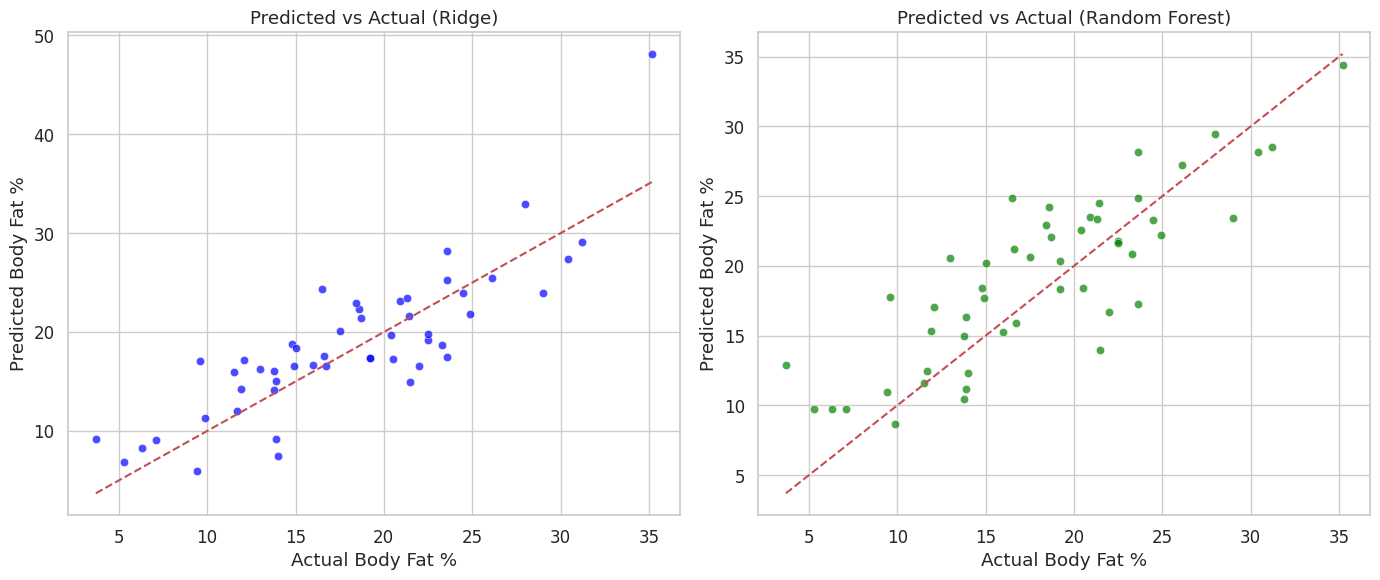

In [118]:
# Plotting 'Predicted vs Actual' for models 2 and 3
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x=y_test, y=y_preds_2, alpha=0.7, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Body Fat %")
plt.ylabel("Predicted Body Fat %")
plt.title("Predicted vs Actual (Ridge)")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=y_preds_3, alpha=0.7, color="green")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Body Fat %")
plt.ylabel("Predicted Body Fat %")
plt.title("Predicted vs Actual (Random Forest)")

plt.tight_layout()
plt.show()

These two graphs explain why, despite Model 3 (Random Forest) performing better from the test results, its cross-validation score was worse than Model 2 (Ridge), of which the results were more consistent and stable. The dots in the Model 2 graph are consistently closer to the diagonal, whereas in the Model 3 graph, the dots are closer to the diagonal in some regions but not in others.

Although an R² of 0.651 is a moderately good score, considering we trained the model on a small dataset (consisting only of 252 observations), we can consider that the Ridge model is nevertheless solid, offering stable predictions than the rest of the models we have trained and tested.

In [121]:
# Save best model
best_model = model_2

joblib.dump(best_model, '/kaggle/working/best_model.pkl')

['/kaggle/working/best_model.pkl']

In [122]:
preds = y_preds_2
preds

array([17.34232841, 17.392307  , 32.9377776 , 17.26751418, 16.53360136,
       17.15436708, 17.47539668, 22.36954949, 11.98551342, 14.23281165,
       25.50925723, 23.91017765, 18.74574312, 19.1492974 ,  8.26081956,
        6.88997697, 16.54340719, 23.18593155, 19.67943763,  7.43205428,
       16.58600932, 24.38223581, 15.09962147, 14.09181359, 23.42143258,
       27.35641788, 28.1979688 , 18.41482308,  9.07374341, 16.29995871,
       21.83464317, 17.04323047, 20.1209831 , 22.89592876, 21.45296106,
        9.21145642, 21.64726167, 16.62308349, 17.53958342, 16.00883182,
       16.05071416, 25.27785424, 29.12439784,  5.92534929,  9.23666479,
       19.82972959, 23.91756311, 14.93949839, 18.70824832, 11.27992982,
       48.11860275])

In [123]:
y_test

array([19.2, 19.2, 28. , 20.5, 16.7, 12.1, 23.6, 18.6, 11.7, 11.9, 26.1,
       24.5, 14.8, 22.5,  6.3,  5.3, 22. , 20.9, 20.4, 14. , 14.9, 16.5,
       13.9, 13.8, 21.3, 30.4, 23.6, 15. ,  7.1, 13. , 24.9,  9.6, 17.5,
       18.4, 18.7,  3.7, 21.4, 16. , 16.6, 11.5, 13.8, 23.6, 31.2,  9.4,
       13.9, 22.5, 29. , 21.5, 23.3,  9.9, 35.2])

In [126]:
# Save predictions
predictions = pd.DataFrame(zip(preds, y_test), columns=['Predictions', 'Actual'])
predictions.head()

,Predictions,Actual
0,17.342328,19.2
1,17.392307,19.2
2,32.937778,28.0
3,17.267514,20.5
4,16.533601,16.7


In [127]:
predictions.to_csv('/kaggle/working/predictions.csv')